In [1]:
import pandas as pd
import numpy as np
import os
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle



In [2]:
def positional_encoding(max_position, d_model, min_freq=1e-4):
    position = np.arange(max_position)
    freqs = min_freq**(2*(np.arange(d_model)//2)/d_model)
    pos_enc = position.reshape(-1,1)*freqs.reshape(1,-1)
    pos_enc[:, ::2] = np.cos(pos_enc[:, ::2])
    pos_enc[:, 1::2] = np.sin(pos_enc[:, 1::2])
    return pos_enc

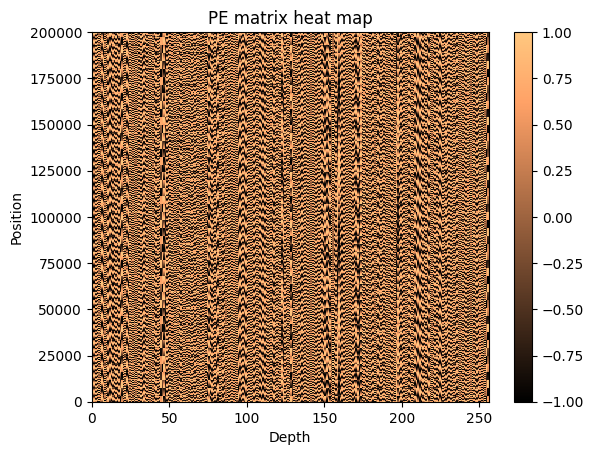

In [4]:
d_model = 256
max_pos = 200000
min_freq=1e2
mat = positional_encoding(max_pos, d_model,min_freq)
mat=mat.astype("float32")
plt.pcolormesh(mat, cmap='copper')
plt.xlabel('Depth')
plt.xlim((0, d_model))
plt.ylabel('Position')
plt.title("PE matrix heat map")
plt.colorbar()
plt.show()

In [3]:
P2=positional_encoding(200000,256, min_freq=1e2)

In [5]:
P2[14910]

array([ 0.9999992 ,  0.00126606,  0.90522277, -0.42493733,  0.96100375,
        0.27653533, -0.96888594,  0.24750764, -0.29633569,  0.95508385,
       -0.40854253, -0.91273929, -0.02791688, -0.99961025, -0.72806672,
       -0.68550628, -0.94429485,  0.32910065, -0.68259379,  0.730798  ,
       -0.96994658, -0.24331797,  0.76720244,  0.64140503,  0.02540248,
        0.9996773 ,  0.76371251,  0.6455565 ,  0.73458523, -0.67851643,
       -0.09740007, -0.99524531,  0.62474406, -0.7808296 , -0.93684125,
        0.34975487, -0.35761703, -0.93386833,  0.37299553, -0.92783314,
        0.99538186,  0.09599454, -0.98442945, -0.17578012, -0.87512173,
       -0.48390284, -0.84988817,  0.52696308, -0.12708698,  0.99189158,
       -0.85646102,  0.51621171,  0.77570818,  0.63109177, -0.67534871,
       -0.73749856, -0.1274767 ,  0.99184157, -0.43154888,  0.90208955,
        0.83690231,  0.54735229,  0.82102351, -0.57089438,  0.8590589 ,
        0.51187675,  0.9937192 , -0.1119024 ,  0.94919371, -0.31

In [4]:
P2[14910]*0.9

array([ 0.89999928,  0.00113946,  0.81470049, -0.3824436 ,  0.86490338,
        0.24888179, -0.87199735,  0.22275687, -0.26670212,  0.85957546,
       -0.36768827, -0.82146536, -0.02512519, -0.89964922, -0.65526004,
       -0.61695565, -0.84986536,  0.29619059, -0.61433441,  0.6577182 ,
       -0.87295192, -0.21898617,  0.6904822 ,  0.57726453,  0.02286223,
        0.89970957,  0.68734126,  0.58100085,  0.6611267 , -0.61066479,
       -0.08766006, -0.89572078,  0.56226965, -0.70274664, -0.84315713,
        0.31477938, -0.32185533, -0.8404815 ,  0.33569598, -0.83504982,
        0.89584367,  0.08639509, -0.88598651, -0.1582021 , -0.78760956,
       -0.43551255, -0.76489936,  0.47426677, -0.11437828,  0.89270242,
       -0.77081491,  0.46459054,  0.69813736,  0.56798259, -0.60781384,
       -0.6637487 , -0.11472903,  0.89265741, -0.38839399,  0.8118806 ,
        0.75321208,  0.49261706,  0.73892116, -0.51380494,  0.77315301,
        0.46068908,  0.89434728, -0.10071216,  0.85427434, -0.28

In [8]:
np.dot(P2[14910]*0.1,P2[14910])

12.8

In [8]:
np.dot(P2[14910],P2[14911])

-9.474625841195888

In [9]:
list(P2[50000])

[-0.017877255966556333,
 -0.9998401890897896,
 -0.07994124245430898,
 0.9967995775254228,
 -0.9643717025548809,
 0.26455097677272016,
 -0.173076127671308,
 -0.9849084495679307,
 -0.9731749472080908,
 0.23006634288076477,
 0.8090345905188021,
 0.5877610325158296,
 0.9076568346643283,
 0.4197130811484581,
 0.43501377772420774,
 -0.900423796437052,
 0.46171238637004897,
 -0.8870296907502446,
 -0.9083828013221036,
 -0.41813955357297616,
 -0.9476949653017803,
 -0.31917746277213466,
 -0.29221885405794007,
 0.9563514737443888,
 -0.5669120424593287,
 0.8237783294761961,
 -0.05343550576421896,
 0.9985713027739792,
 -0.7456546453562767,
 -0.6663326120329135,
 0.991275770854437,
 0.13180419612797514,
 0.8166464686671175,
 0.5771382375250548,
 -0.9993065516127417,
 0.037234606266897036,
 0.731540419272388,
 -0.6817980749245182,
 0.9570185179726366,
 -0.29002681989336465,
 -0.9125276447918039,
 0.40901503333095623,
 0.9114562769752127,
 0.4113969557039579,
 -0.6764478612632211,
 -0.7364905233554699

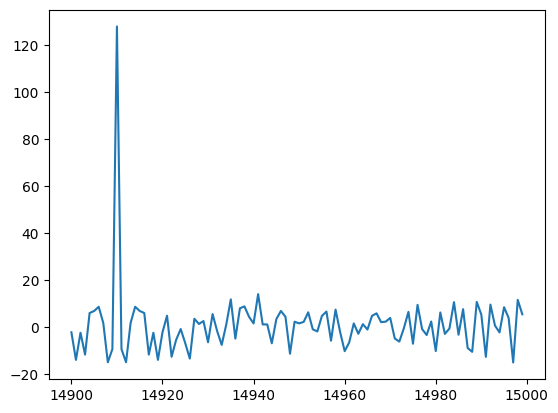

In [10]:
dots=range(14900, 15000, 1)
dots=list(dots)
dots_calc=[np.dot(P2[i],P2[14910]) for i in dots ]
plt.plot(dots,dots_calc)
plt.show()

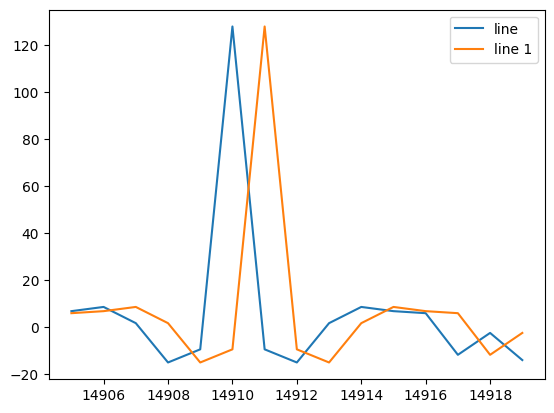

In [11]:
dots=range(14905, 14920, 1)
dots=list(dots)
dots_calc=[np.dot(P2[i],P2[14910]) for i in dots ]
dots1=range(14905, 14920, 1)
dots1=list(dots)
dots_calc1=[np.dot(P2[i],P2[14911]) for i in dots ]
plt.plot(dots,dots_calc, label = "line")
plt.plot(dots1,dots_calc1, label = "line 1")
plt.legend()
plt.show()

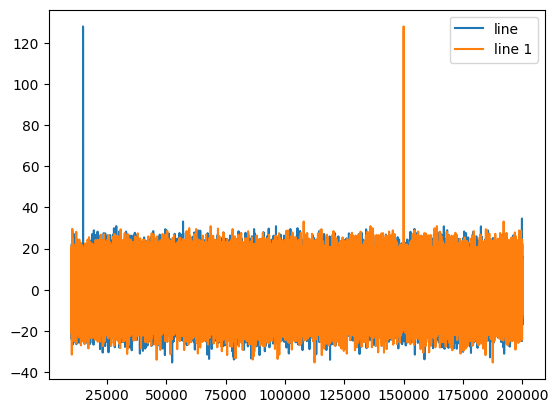

In [12]:
dots=range(10000, 200000, 1)
dots=list(dots)
dots_calc=[np.dot(P2[i],P2[14910]) for i in dots ]
dots1=range(10000, 200000, 1)
dots1=list(dots)
dots_calc1=[np.dot(P2[i],P2[150000]) for i in dots ]
plt.plot(dots,dots_calc, label = "line")
plt.plot(dots1,dots_calc1, label = "line 1")
plt.legend()
plt.show()

In [13]:
np.dot(P2[15012],P2[14910])

-4.538308565730063

In [14]:
np.dot(P2[95000],P2[150000])

1.5508645506305854

In [261]:
np.dot(P[14910],P[199999])

1.16089646050858